# Analyzing Selfplay Data

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from aegomoku.game_data import read_training_data
from aegomoku.utils import analyse_example

In [56]:
BOARD_SIZE=15
filename = "/Users/wgiersche/workspace/Project-Ellie/DATA/00006.pickle"
examples = read_training_data(filename, BOARD_SIZE)
len(examples), len(examples[0]), examples[0][0].shape

(320, 3, (17, 17, 3))

---
### Data Verification
We have records from those games in 8 symmetries. Now we skim through a good chunk of training records to check whether it makes sense (to some degree).

Next to play: WHITE
Value from WHITE's point of view: -1.0


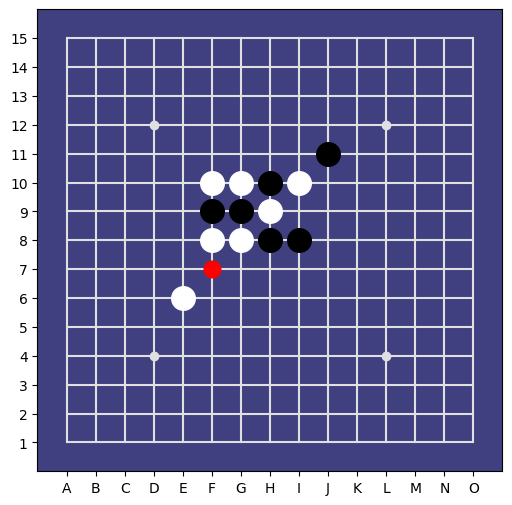

In [61]:
import random

analyse_example(BOARD_SIZE, examples[random.randint(0, len(examples))], policy_cutoff=.01)